# Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded (**JK YOU HAVE TO REMAKE BELOW LOLZ**). You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

**Instructions:**
- Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two Dense layers you add with the 'relu' activation. Use 2 nodes for the Dense output layer with 'softmax' as the activation.
- Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [4]:
# Get data
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [5]:
# convert data from DataFrame to matrix (predictors).
# we don't need to convert target to a matrix, as the to_categorical function will do that for us
from keras.utils import to_categorical

predictor_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'male',
       'age_was_missing', 'embarked_from_cherbourg',
       'embarked_from_queenstown', 'embarked_from_southampton']

predictors = df[predictor_cols].as_matrix()

# get number of input nodes
n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(df.survived)

print(predictors[0:5])
print(target[0:5])


Using TensorFlow backend.


[[3 22.0 1 0 7.25 1 False 0 0 1]
 [1 38.0 1 0 71.2833 0 False 1 0 0]
 [3 26.0 0 0 7.925 0 False 0 0 1]
 [1 35.0 1 0 53.1 0 False 0 0 1]
 [3 35.0 0 0 8.05 1 False 0 0 1]]
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


In [6]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


# Time for model_2!!!!

Train on 712 samples, validate on 179 samples
Epoch 1/15
712/712 [==============================] - 0s - loss: 3.9792 - acc: 0.6096 - val_loss: 3.2366 - val_acc: 0.6425
Epoch 2/15
712/712 [==============================] - 0s - loss: 2.8886 - acc: 0.6096 - val_loss: 2.1700 - val_acc: 0.6425
Epoch 3/15
712/712 [==============================] - 0s - loss: 1.4362 - acc: 0.4410 - val_loss: 0.8072 - val_acc: 0.4078
Epoch 4/15
712/712 [==============================] - 0s - loss: 0.7731 - acc: 0.5112 - val_loss: 0.5700 - val_acc: 0.7374
Epoch 5/15
712/712 [==============================] - 0s - loss: 0.6851 - acc: 0.6475 - val_loss: 0.5674 - val_acc: 0.7318
Epoch 6/15
712/712 [=====

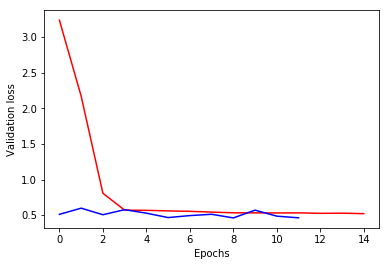

In [7]:
import matplotlib.pyplot as plt
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, 
                               epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor], 
                               verbose=True)

# Fit model_2
model_2_training = model_2.fit(predictors, target, 
                               epochs=15, 
                               validation_split=0.2, 
                               callbacks=[early_stopping_monitor], 
                               verbose=True)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()


**The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model. Nice job!**

# Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

**Instructions:**
- Specify a model called model_2 that is like model_1, but which has 3 hidden layers of 50 units instead of only 1 hidden layer.
 - Use input_shape to specify the input shape in the first hidden layer.
 - Use 'relu' activation for the 3 hidden layers and 'softmax' for the output layer, which should have 2 units.
- Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! For both models, you should look for the best val_loss and val_acc, which won't be the last epoch for that model.

In [8]:
#Create model_1 again

# Specify the model
model_1b = Sequential()
model_1b.add(Dense(50, activation='relu', input_shape = input_shape))
model_1b.add(Dense(2, activation='softmax'))

# Compile the model
model_1b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


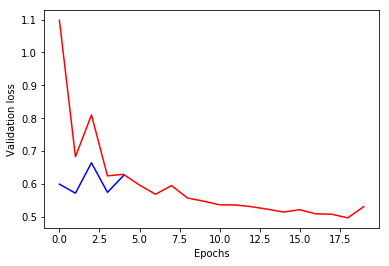

In [9]:
# Create the new model: model_2
model_2b = Sequential()

# Add the first, second, and third hidden layers
model_2b.add(Dense(50,activation='relu',input_shape=input_shape))
model_2b.add(Dense(50,activation='relu'))
model_2b.add(Dense(50,activation='relu'))

# Add the output layer
model_2b.add(Dense(2,activation='softmax'))

# Compile model_2
model_2b.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model_1b.fit(predictors, target, 
                                epochs=20, 
                                validation_split=0.4, 
                                callbacks=[early_stopping_monitor], 
                                verbose=False)

# Fit model 2
model_2_training = model_2b.fit(predictors, target, 
                                epochs=20, 
                                validation_split=0.4, 
                                callbacks=[early_stopping_monitor], 
                                verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()


# Video: Thinking About Model Capacity

It takes some practice to get an intution for what experiments and architectures to try when tuning your deep learning models. 

However, model capacity should be a key consideration (also called Network Capacity). Its very closely related to overfitting and underfitting. **Remember, validation score is the ultimate measure of a models predictive quality**.

![](pictures/modelcap1.png)

**You can replace the Model Complexity with Model Capacity in the graph above**. Model capacity is a models ability to capture predictive patterns in your data, so the more capacity, the further to right on the grpah. If you increase the number of nodes or hidden layers, that increases model capacity. 

Here is a good workflow for model capcaity. 
- Start with small netrwork
- get validaitons score
- keep adding capacity until validation score is no longer improving

There is no rule for whether you should increase nodes or layers, this is kind of more art that science! But def follow this model capacity workflow to get to the ideal model.

![](pictures/modcap1.png)






# Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise!https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws#gs.z0ysHGM It is a great next step as you continue your deep learning journey.

**Instructions:**

- Create a Sequential object to start your model. Call this model.
- Add the first Dense hidden layer of 50 units to your model with 'relu' activation. For this data, the input_shape is (784,).
- Add a second Dense hidden layer with 50 units and a 'relu' activation function.
- Add the output layer. Your activation function should be 'softmax', and the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.
- Compile model as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Fit the model using X and y using a validation_split of 0.3.

# Video: Stepping up to images!!!

- Going to use the MNIST data set which contains images of handwritten digits. 
- each image is compose of 28 X 28 pixel grid, flattened to 784 vales for each image (one array or row for each image)
- each value in each part of the array denotes the darkness of that pixel (0 is dark as possible, 255 is as light as possible)
- you model will predict which digit that was written. You will create a deep learning model taking in the 784 features as inputs and predicting which of the 10 possible values the ouput is!!!

**This is essentially a muli-class categorical prediction model!!!**

In [10]:
import pandas as pd
df = pd.read_csv('mnist.csv')
y = to_categorical(df['5'])
X = df.iloc[:,1:].as_matrix()

X.shape

(2000, 784)

In [11]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3,epochs=20)


Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 0s - loss: 12.0896 - acc: 0.2314 - val_loss: 9.9686 - val_acc: 0.3567
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 9.0643 - acc: 0.4171 - val_loss: 8.1232 - val_acc: 0.4883
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 8.4261 - acc: 0.4636 - val_loss: 8.3949 - val_acc: 0.4667
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 8.1881 - acc: 0.4836 - val_loss: 

**So our model has a pretty low accuracy (around 50%), but we only used 1400 images to train the data. The actual set has around 60,000 images to train the data with. Apparently when you use the whole set you get SUPER high accuracy. Which is dope. Got to that blog post and use the GPU thing to test out this model with the full set and see how high you can get the accuracy to be!!!**

You need a CUDE compatiable Graphical Procesing Unit (GPU). But you can use the blog post to set one up on the cloud using Jupyter.